## Goal:
### Explore the Geyser dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

### 1. Why This Project?
 
#### 1.Learn data cleaning with Pandas.
 
#### 2.Use NumPy for calculations (mean, median, etc.).
 
#### 3.Visualize trends using Matplotlib and Seaborn.
 
#### 4.Understand the relationship between geyser features (Duration, waiting, kind)

### 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### 3. Load Dataset

In [5]:
df = sns.load_dataset('geyser')
df.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


### 4. Explore Data

In [6]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (272, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  272 non-null    float64
 1   waiting   272 non-null    int64  
 2   kind      272 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 6.5+ KB
None
duration    0
waiting     0
kind        0
dtype: int64
         duration     waiting
count  272.000000  272.000000
mean     3.487783   70.897059
std      1.141371   13.594974
min      1.600000   43.000000
25%      2.162750   58.000000
50%      4.000000   76.000000
75%      4.454250   82.000000
max      5.100000   96.000000


### Insights:
 
#### 1.There are 273 geyser with multiple features (Duration, waiting and kind).
 
#### 2.Missing values exist in Duration, waiting and kind columns.
 
#### 3.Understanding these helps guide data cleaning.

### 5. Data Cleaning

In [7]:
# Fill missing 'duration' values with mean
df['duration'] = df['duration'].fillna(df['duration'].mean())

# Fill missing 'kind' (categorical) values with mode
df['kind'] = df['kind'].fillna(df['kind'].mode()[0])

# Drop rows with missing 'waiting' values
df = df.dropna(subset=['waiting'])


### 6. Analysis with NumPy & Pandas

In [8]:
# Average duration
avg_duration = np.mean(df['duration'])
print("Average Duration:", avg_duration)

# Average waiting time
avg_waiting = np.mean(df['waiting'])
print("Average Waiting Time:", avg_waiting)

# Average duration by kind
avg_duration_by_kind = df.groupby('kind')['duration'].mean()
print("Average Duration by Kind:\n", avg_duration_by_kind)

# Average waiting time by kind
avg_waiting_by_kind = df.groupby('kind')['waiting'].mean()
print("Average Waiting Time by Kind:\n", avg_waiting_by_kind)


Average Duration: 3.4877830882352936
Average Waiting Time: 70.8970588235294
Average Duration by Kind:
 kind
long     4.29793
short    2.09433
Name: duration, dtype: float64
Average Waiting Time by Kind:
 kind
long     80.284884
short    54.750000
Name: waiting, dtype: float64


### 7. Visualization with Matplotlib

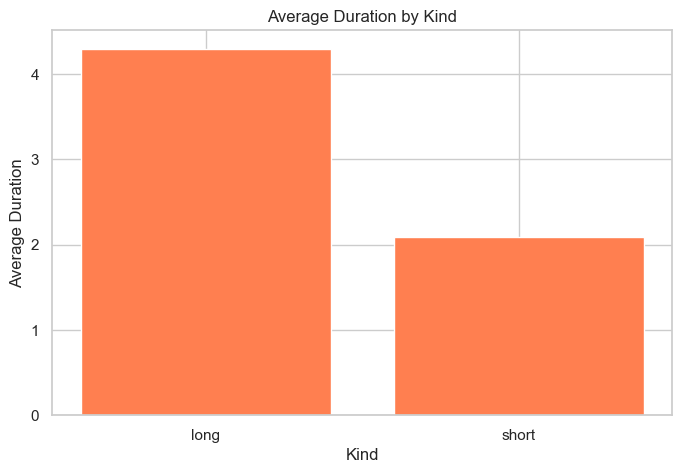

In [9]:
# Bar plot: Average duration by kind
avg_duration_by_kind = df.groupby('kind')['duration'].mean()
plt.figure(figsize=(8,5))
plt.bar(avg_duration_by_kind.index, avg_duration_by_kind.values, color='coral')
plt.xlabel('Kind')
plt.ylabel('Average Duration')
plt.title('Average Duration by Kind')
plt.show()

### Insights:

1. The average duration is clearly higher for the "long" kind compared to "short," indicating distinct categories by task length.

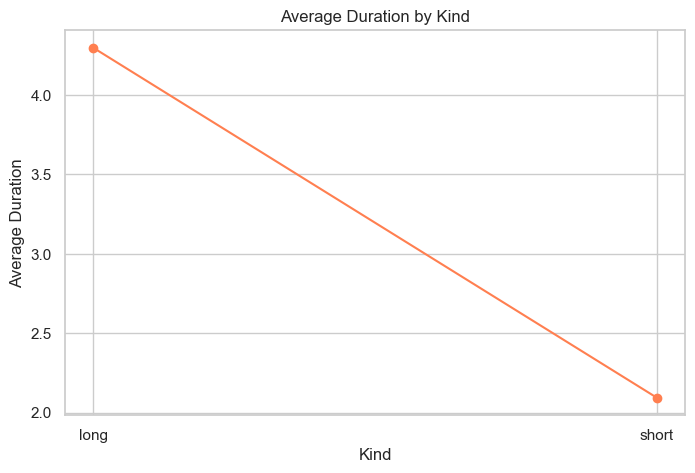

In [10]:
# Line plot: Average duration by kind
avg_duration_by_kind = df.groupby('kind')['duration'].mean()

plt.figure(figsize=(8,5))
plt.plot(avg_duration_by_kind.index, avg_duration_by_kind.values, marker='o', linestyle='-', color='coral')
plt.xlabel('Kind')
plt.ylabel('Average Duration')
plt.title('Average Duration by Kind')
plt.grid(True)
plt.show()

### Insights:

1. The line plots reinforce the bar plot findings by showing smooth trends where "long" kind consistently has higher average duration and waiting compared to "short."

### 8. Visualization with Seaborn

C:\Users\Koush\AppData\Local\Temp\ipykernel_836\199355894.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='kind', y='duration', data=df, palette='pastel', inner='quartile')


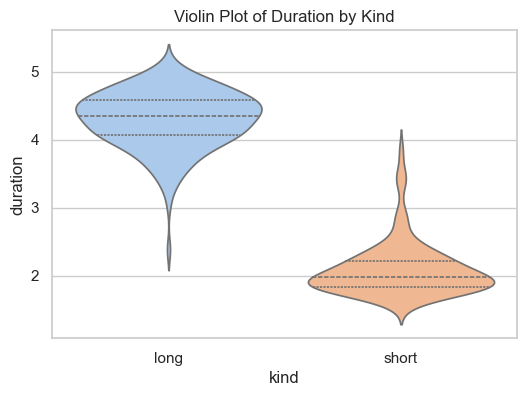

In [11]:
# Violin plot of duration
plt.figure(figsize=(6,4))
sns.violinplot(x='kind', y='duration', data=df, palette='pastel', inner='quartile')
plt.title('Violin Plot of Duration by Kind')
plt.show()

###  Insights:
 
1. Shows that "long" kind has a wider distribution with higher median durations compared to "short," confirming differentiation in task length.

C:\Users\Koush\AppData\Local\Temp\ipykernel_836\4216402265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='kind', data=df, palette='bright')


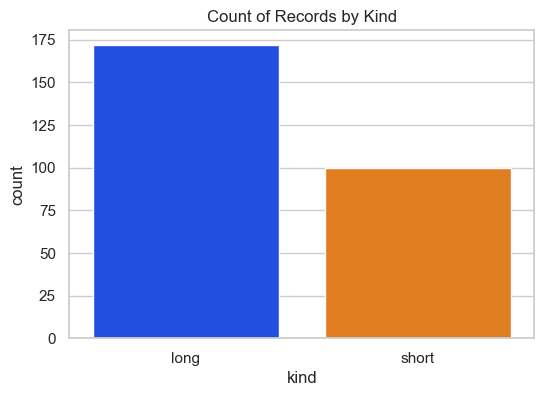

In [13]:
# Countplot of kind categories
plt.figure(figsize=(6,4))
sns.countplot(x='kind', data=df, palette='bright')
plt.title('Count of Records by Kind')
plt.show()

###  Insights:
 
1. Verifies the number of records in each kind category, showing a balanced or skewed dataset representation as applicable.

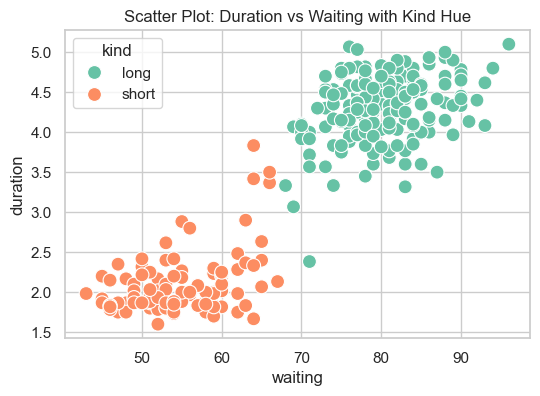

In [15]:
# Scatter plot: duration vs waiting
plt.figure(figsize=(6,4))
sns.scatterplot(x='waiting', y='duration', hue='kind', data=df, s=100, palette='Set2')
plt.title('Scatter Plot: Duration vs Waiting with Kind Hue')
plt.show()

###  Insights:
 
1. Reveals positive correlation between waiting time and duration.

2. Coloring by kind shows clear group separation, where "long" tasks tend to have longer durations and waiting periods.

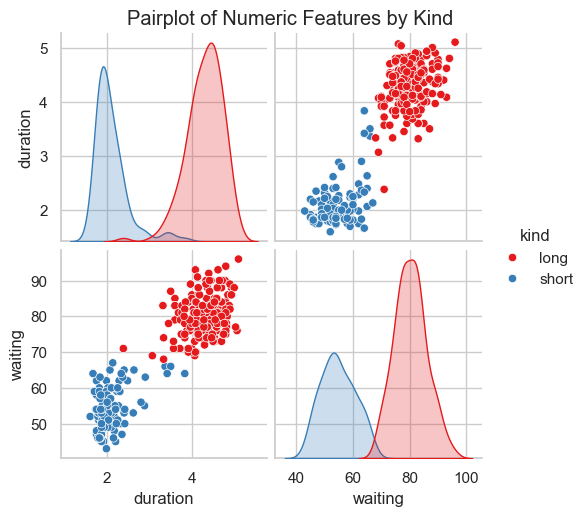

In [16]:
# Pairplot of numeric variables colored by kind
sns.pairplot(df, vars=['duration', 'waiting'], hue='kind', palette='Set1')
plt.suptitle('Pairplot of Numeric Features by Kind', y=1.02)
plt.show()

###  Insights:
 
1. Displays joint distributions and relationships between duration and waiting time.

2. Clear separation between kinds emerges, suggesting distinct feature spaces for "long" and "short."

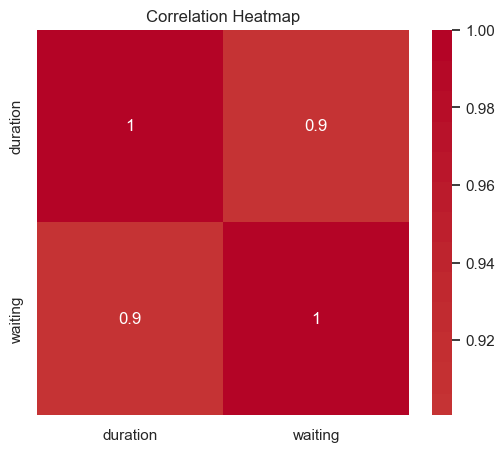

In [17]:
# Heatmap of correlation matrix for numeric features
plt.figure(figsize=(6,5))
corr = df[['duration', 'waiting']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

###  Insights:
 
1. Shows strong positive correlation (close to 1) between duration and waiting time, supporting observed scatter and pairplot trends.